Giraudoux data set
==================

In [1]:
# Path to TBS

import sys
import os

sys.path.append(os.path.dirname('../'))

In [2]:
import TBS.diss.file_io

raw_distance = TBS.diss.file_io.load(open("./resources/giraudoux.mat"))

In [3]:
import TBS.diss.conversion

print(TBS.diss.conversion.to_string(raw_distance, "lowerl"))

Provinciales                 0.0
LEcoleDesIndifferents       14.0  0.0
SimonLePathetique           19.0  7.0  0.0
SuzanneEtLePacifique        24.0 16.0 26.0  0.0
SiegfriedEtLeLimousin       25.0 16.0 32.0 38.0  0.0
JulietteAuPaysDesHommes     25.0 19.0 29.0 34.0 21.0  0.0
Bella                       26.0 18.0 26.0 40.0 21.0 19.0  0.0
Eglantine                   29.0 17.0 33.0 46.0 35.0 25.0 22.0  0.0
Siegfried                   31.0 22.0 27.0 34.0 26.0 33.0 27.0 30.0  0.0
Amphitryon                  35.0 29.0 34.0 38.0 42.0 40.0 42.0 39.0 28.0  0.0
AventuresDeJeromeBardini    27.0 20.0 31.0 38.0 37.0 24.0 25.0 23.0 30.0 35.0  0.0
Judith                      33.0 28.0 31.0 36.0 37.0 40.0 36.0 38.0 26.0 19.0 35.0  0.0
Intermezzo                  28.0 21.0 31.0 36.0 29.0 30.0 29.0 32.0 21.0 25.0 32.0 28.0  0.0
CombatAvecLAnge             24.0 17.0 20.0 23.0 20.0 18.0 18.0 16.0 23.0 28.0 18.0 25.0 20.0  0.0
LaGuerreDeTroieNAuraPasLieu 34.0 34.0 35.0 41.0 38.0 44.0 42.0 40.0 28.0 19.0 40.0 

Approximation
-------------

### isa 

In [4]:
from TBS.totally_balanced_diss.chordal_diss import isa_chordal_diss
from TBS.totally_balanced_diss.totally_balanced_diss import isa_totally_balanced_diss

In [5]:
isa_chordal_diss(raw_distance)

False

In [6]:
isa_totally_balanced_diss(raw_distance)

False

### Approximation

In [7]:
from TBS.totally_balanced_diss.chordal_diss import approximate_chordal_diss

diss_chordal = approximate_chordal_diss(raw_distance)

In [8]:
isa_chordal_diss(diss_chordal)

True

In [9]:
isa_totally_balanced_diss(diss_chordal)

False

In [10]:
from TBS.totally_balanced_diss.totally_balanced_diss import approximation_totally_balanced_diss

diss_totally_balanced = approximation_totally_balanced_diss(raw_distance)

In [11]:
isa_totally_balanced_diss(diss_totally_balanced)

True

Clusters
--------

### Chordal diss

Orders.

In [12]:
from TBS.orders.chordal_order import chordal_order_partition
order_partition = chordal_order_partition(diss_chordal)

for part in order_partition:
    print(part)

{'Eglantine'}
{'JulietteAuPaysDesHommes'}
{'AventuresDeJeromeBardini'}
{'Bella'}
{'SiegfriedEtLeLimousin'}
{'SuzanneEtLePacifique'}
{'Provinciales'}
{'SimonLePathetique'}
{'LEcoleDesIndifferents'}
{'LaFolleDeChaillot'}
{'Siegfried'}
{'Intermezzo'}
{'CombatAvecLAnge'}
{'ChoisDesElues'}
{'Amphitryon'}
{'Ondine'}
{'LaGuerreDeTroieNAuraPasLieu'}
{'SodomeEtGomorrhe', 'Electre'}
{'Judith', 'PourLucrece'}
{'CantiqueDesCantiques', 'ApollonDeBellac'}


In [13]:
order = []
for part in order_partition:
    order.extend(part)

print(order)

['Eglantine', 'JulietteAuPaysDesHommes', 'AventuresDeJeromeBardini', 'Bella', 'SiegfriedEtLeLimousin', 'SuzanneEtLePacifique', 'Provinciales', 'SimonLePathetique', 'LEcoleDesIndifferents', 'LaFolleDeChaillot', 'Siegfried', 'Intermezzo', 'CombatAvecLAnge', 'ChoisDesElues', 'Amphitryon', 'Ondine', 'LaGuerreDeTroieNAuraPasLieu', 'SodomeEtGomorrhe', 'Electre', 'Judith', 'PourLucrece', 'CantiqueDesCantiques', 'ApollonDeBellac']


Clusters.

In [14]:
from TBS.totally_balanced_diss.chordal_diss import chordal_clusters
from TBS.orders.chordal_order import sort_clusters_by_order

clusters = chordal_clusters(diss_chordal)
sorted_clusters = sort_clusters_by_order(clusters, order)

for clusters_order in sorted_clusters:
    print([len(c) for c in clusters_order], clusters_order)

[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23] [frozenset({'Eglantine'}), frozenset({'Eglantine', 'CombatAvecLAnge'}), frozenset({'Eglantine', 'CombatAvecLAnge', 'LEcoleDesIndifferents'}), frozenset({'Eglantine', 'CombatAvecLAnge', 'LEcoleDesIndifferents', 'ChoisDesElues'}), frozenset({'CantiqueDesCantiques', 'Bella', 'Eglantine', 'ChoisDesElues', 'CombatAvecLAnge', 'LEcoleDesIndifferents'}), frozenset({'CantiqueDesCantiques', 'Bella', 'Eglantine', 'AventuresDeJeromeBardini', 'ChoisDesElues', 'CombatAvecLAnge', 'LEcoleDesIndifferents'}), frozenset({'CantiqueDesCantiques', 'Bella', 'Eglantine', 'AventuresDeJeromeBardini', 'ChoisDesElues', 'ApollonDeBellac', 'CombatAvecLAnge', 'LEcoleDesIndifferents'}), frozenset({'CantiqueDesCantiques', 'JulietteAuPaysDesHommes', 'Bella', 'Eglantine', 'AventuresDeJeromeBardini', 'ChoisDesElues', 'ApollonDeBellac', 'CombatAvecLAnge', 'LEcoleDesIndifferents'}), frozenset({'CantiqueDesCantiques', 'JulietteAuPaysDesHommes', 'Be

drawing: all the elements.

In [15]:
# Matplotlib imports

from matplotlib import pyplot
import matplotlib
import matplotlib.cm

%matplotlib inline

In [16]:
def draw_all(sorted_clusters, order):
    position_y = {elem: len(order) - i for i, elem in enumerate(order)}
    colors = matplotlib.cm.rainbow([0. + 1.0 * x / (len(sorted_clusters) - 1) for x in range(len(sorted_clusters))])

    for label in order:
        pyplot.text(0, position_y[label], label, ha='right')

    x = -1
    for color, clusters_elem in enumerate(sorted_clusters):
        for i, cluster in enumerate(clusters_elem):
            x += 1
            for elem in cluster:
                if i > 0 and elem in clusters_elem[i - 1]:
                    marker = "x"
                else:
                    marker="o"
                pyplot.scatter(x, position_y[elem], marker=marker, color=colors[color], edgecolors=None)

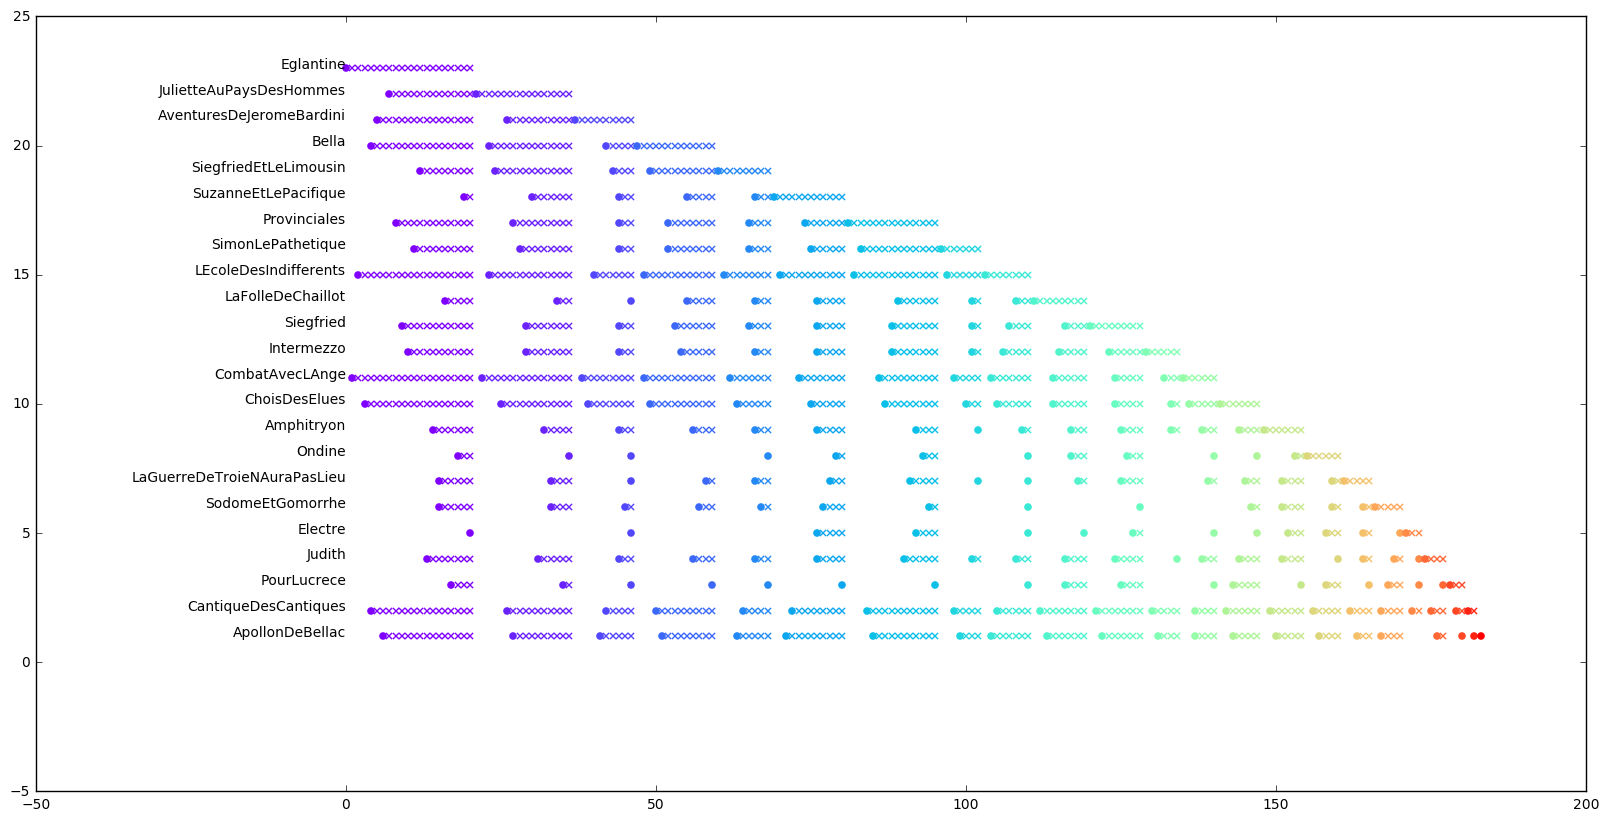

In [19]:
order_partition = chordal_order_partition(diss_chordal)
order = []
for part in order_partition:
    order.extend(part)


clusters = chordal_clusters(diss_chordal)
sorted_clusters = sort_clusters_by_order(clusters, order)

pyplot.figure(figsize=(20, 10))
draw_all(sorted_clusters, order)

In [18]:
def draw_line(sorted_clusters, order):
    position_x = {elem: i for i, elem in enumerate(order)}

    pyplot.figure(figsize=(15, 15))

    for label in order:
        pyplot.text(position_x[label], - 1, label, ha='center', rotation='vertical')

    for x, clusters_elem in enumerate(sorted_clusters):
        for cluster in clusters_elem:
            pyplot.scatter(x, len(cluster), marker="o", edgecolors=None)

    for x, clusters_elem in enumerate(sorted_clusters):
        for x2, cluster_before in enumerate(sorted_clusters[:x]):
            for cluster in clusters_elem:
                print("prout")

            

SyntaxError: unexpected EOF while parsing (<ipython-input-18-a0b8a9c6e238>, line 18)

In [ ]:
draw_line(sorted_clusters, order)

### Associated lattice

In [ ]:
import TBS.clusters.from_dlo_gamma_free_matrix
from TBS.contextmatrix import ContextMatrix


In [ ]:
clusters = chordal_clusters(diss)

In [ ]:
context_matrix = ContextMatrix.from_clusters(clusters).reorder_doubly_lexical_order()

lattice = TBS.clusters.from_dlo_gamma_free_matrix.lattice(context_matrix.matrix)

The lattice elements are the boxes. To have the associated number uses boxes from the cluster submodule.
If the matrix is the same as for the creation of the lattice, the associated numbers are the same as for the print.

In [ ]:
boxes = TBS.clusters.from_dlo_gamma_free_matrix.boxes(context_matrix.matrix)

### Clusters sorted according a chordal order

In [ ]:
from TBS.totally_balanced_diss.chordal_order import chordal_order, sort_clusters_by_order

# chordal_order = chordal_order(diss)
chordal_order = list(context_matrix.elements)
sorted_clusters = sort_clusters_by_order(clusters, chordal_order)

## Representant and hierarchical representation


In [ ]:
# Matplotlib imports

from matplotlib import pyplot
import matplotlib
import matplotlib.cm

In [ ]:
%matplotlib inline
pyplot.figure(figsize=(15, 15))

pos_y = {x: len(chordal_order) - 1 - i for i, x in enumerate(chordal_order)}
colors = matplotlib.cm.rainbow([0. + 1.0 * x / (len(sorted_clusters) - 1) for x in range(len(sorted_clusters))])
x = 0
for col, clusters in enumerate(sorted_clusters): 
    if len(clusters)== 1 and len(clusters[0]) == 1:
        continue
    x -= len(clusters)
    pyplot.annotate(str(chordal_order[col]), xy=(x-1, len(chordal_order) - col), color="black")

    for i in range(len(clusters)):
        cluster = clusters[i]
        for elem in cluster:
            y = pos_y[elem]
            pyplot.scatter(x + i, y, marker="o", color=colors[col], edgecolors=None)


We will draw each element accordind to it's hierarchical depth.

In [ ]:
from TBS.hierarchical_decomposition import hierarchical_height_from_lattice

hierarchy_association = hierarchical_height_from_lattice(lattice)

hierarchy_association["BOTTOM"] = max(hierarchy_association.values()) + 1
hierarchy_association["TOP"] = 0

number_hierarchies = max(hierarchy_association.values()) + 1

We will draw it using matplotlib and each element will be represented by:
  - a triangle facing up if it's an element (sup irreducible)
  - a triangle facing down if it's an attribute (inf irreducible)
  - a losange if it is both an element and an attribute (doubly irreducible)
  - a circle otherwise
  
The edges will be plain and with the same color if it links two elements from the same hierarchy and dashed otehrwise.

In [ ]:
# draw helper methods

def point_transformation_square(max_y):
    return lambda line, column: (column, max_y - line)

colors = matplotlib.cm.rainbow([0. + 1.0 * x / (number_hierarchies - 1) for x in range(number_hierarchies)])
def edge_color(vertex1, vertex2=None):
    if vertex2 is None:
        vertex2 = vertex1
            
    return colors[max(hierarchy_association[vertex1], hierarchy_association[vertex2])]                

In [ ]:
from TBS.lattice import sup_irreducible, inf_irreducible

def draw(plot2d, lattice, point_transformation, colors, representant):
    objects = sup_irreducible(lattice)
    attributes = inf_irreducible(lattice)

    for elem in lattice:
        if elem == "BOTTOM":
            continue
        x, y = point_transformation(*representant[elem])
        if elem in objects:
            type = "^"                        
        elif elem in attributes:
            type = "v"
        else:
            type = "o"
        if elem in objects and elem in attributes:
            type = "d"
        
        
        if elem in objects and elem not in ("BOTTOM", "TOP"):
            x = 0
            plot2d.annotate(str(context_matrix.elements[elem[0][0]]), xy=(x - 5, y - .5), color="black")
            
        plot2d.scatter(x, y, marker=type, zorder=1, color=edge_color(elem, elem), edgecolors='black')
        

        for neighbor in lattice[elem]:
            x2, y2 = point_transformation(*representant[neighbor])
            color = edge_color(elem, neighbor)
            if hierarchy_association[elem] != hierarchy_association[neighbor]:
                type = ":"
                type = "-"
                plot2d.plot([x, x2], [y, y2], color=color, zorder=0, linestyle=type)
            else:
                type = "-"
                plot2d.plot([x, x2, x2], [y, y, y2], color=color, zorder=0, linestyle=type)

            
points = {box: box[0] for box in lattice if box not in ("BOTTOM", "TOP")}
points["BOTTOM"] = (len(context_matrix.matrix), 0)
points["TOP"] = (0, len(context_matrix.matrix[0]))

In [ ]:
%matplotlib inline
pyplot.figure(figsize=(15, 15))

draw(pyplot,
     lattice, 
     point_transformation_square(len(context_matrix.matrix)),
     colors,
     points)

In [ ]:
import TBS.clusters.to_image

TBS.clusters.to_image.create_image_from_dlo_gamma_free_matrix(context_matrix.matrix, pixel_size=10)